# Specifically focusing on the analysis aspect, showcasing crime rates pre, during and post COVID-19

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Upload the datasets
crime_pre = pd.DataFrame(pd.read_csv("MPS Borough Level Crime (Historical).csv"))  # Data pre covid-19
crime_post = pd.DataFrame(pd.read_csv("MPS Borough Level Crime (most recent 24 months).csv"))  # Data post covid-19

In [21]:
# Get the count of null values in the entire DataFrame
total_null = crime_pre.isnull().sum().sum()
total_null1 = crime_post.isnull().sum().sum()
# Display total null count
print(f"Total null values: {total_null, total_null1}")

Total null values: (0, 0)


In [22]:
crime_post

,MajorText,MinorText,BoroughName,202211,202212,202301,202302,202303,202304,202305,...,202401,202402,202403,202404,202405,202406,202407,202408,202409,202410
0,ARSON AND CRIMINAL DAMAGE,ARSON,Barking and Dagenham,3,1,3,3,2,2,5,...,4,5,6,3,8,2,2,9,9,5
1,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Barking and Dagenham,101,91,93,91,110,97,108,...,126,124,131,109,100,105,132,111,80,102
2,BURGLARY,BURGLARY - RESIDENTIAL,Barking and Dagenham,0,0,0,0,0,0,0,...,0,2,50,52,41,37,38,44,49,64
3,BURGLARY,BURGLARY BUSINESS AND COMMUNITY,Barking and Dagenham,21,21,27,18,32,36,27,...,31,21,30,24,28,32,22,26,31,29
4,BURGLARY,BURGLARY IN A DWELLING,Barking and Dagenham,64,84,91,38,55,60,51,...,67,47,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,VEHICLE OFFENCES,THEFT FROM A VEHICLE,Westminster,287,240,306,287,318,312,311,...,238,285,290,329,275,286,237,299,249,288
1011,VEHICLE OFFENCES,THEFT OR UNAUTH TAKING OF A MOTOR VEH,Westminster,65,42,57,74,52,60,58,...,48,46,56,59,48,51,44,41,66,65
1012,VIOLENCE AGAINST THE PERSON,HOMICIDE,Westminster,1,0,0,0,1,0,0,...,0,0,1,1,0,2,0,1,0,1
1013,VIOLENCE AGAINST THE PERSON,VIOLENCE WITH INJURY,Westminster,300,379,311,265,299,291,349,...,293,305,266,225,293,266,253,259,252,281


In [23]:
# Renaming the borough column
crime_brgh = crime_pre.rename(columns = {'BoroughName' : 'Borough'})
# Grouping the borough column to eliminate multiple entries of the same borough
crime_brgh_pre = crime_brgh.groupby('Borough', as_index=False).sum()

# Renaming the borough column
crime_brgh = crime_post.rename(columns = {'BoroughName' : 'Borough'})
# Grouping the borough column to eliminate multiple entries of the same borough
crime_brgh_post = crime_brgh.groupby('Borough', as_index=False).sum()

# Removing the types of crime 
crime_brgh_pre = crime_brgh_pre.drop(columns=['MajorText', 'MinorText'])
crime_brgh_post = crime_brgh_post.drop(columns=['MajorText', 'MinorText'])

In [25]:
crime_brgh_pre = crime_brgh_pre.loc[:, crime_brgh_pre.columns >= '201709']
crime_brgh_pre

,Borough,201709,201710,201711,201712,201801,201802,201803,201804,201805,...,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210
0,Barking and Dagenham,1514,1612,1497,1425,1481,1407,1574,1424,1472,...,1557,1518,1637,1555,1630,1705,1614,1686,1568,1790
1,Barnet,2115,2346,2401,2029,2197,2058,2347,2287,2284,...,2278,2154,2382,2159,2474,2230,2265,2301,2272,2330
2,Bexley,1271,1394,1328,1155,1256,1073,1178,1173,1278,...,1264,1285,1382,1245,1346,1374,1246,1315,1356,1328
3,Brent,2458,2724,2619,2390,2421,2291,2445,2329,2553,...,2278,2299,2575,2424,2541,2530,2523,2526,2432,2454
4,Bromley,1805,1833,1984,1800,1996,1709,1924,1864,1962,...,1950,1797,1965,1860,1960,1925,2001,1858,1784,1846
5,Camden,3265,3583,3362,2954,3099,2735,2935,2818,2967,...,2411,2564,2898,2877,3028,2836,3004,2921,2748,3231
6,Croydon,2438,2431,2535,2496,2565,2369,2497,2446,2580,...,2721,2545,2748,2662,2931,2870,2929,2823,2881,2895
7,Ealing,2224,2628,2547,2102,2290,2061,2255,2283,2393,...,2232,2248,2435,2226,2570,2455,2538,2460,2271,2578
8,Enfield,2000,2258,2261,2034,2169,2065,2263,2298,2424,...,2506,2317,2666,2325,2627,2647,2510,2459,2324,2482
9,Greenwich,2086,2308,2026,1972,2023,1739,1916,2053,2221,...,2101,2048,2340,2078,2348,2345,2334,2162,2117,2280


In [26]:
### For pre dataset

def format_columns(crime_brgh_pre):
    def format_column_name(col):
        if col.isdigit():  # check if  column is numeric
            return pd.to_datetime(col, format='%Y%m').strftime('%b-%Y')  # convert to mm-yyyy format
        return col  # Keep non-date columns unchanged

    crime_brgh_pre.columns = [format_column_name(col) for col in crime_brgh_pre.columns]
    return crime_brgh_pre

# Apply the function to your DataFrame
crime_brgh_pre = format_columns(crime_brgh_pre)

### For post dataset

def format_columns(crime_brgh_post):
    def format_column_name(col):
        if col.isdigit():  # check if  column is numeric
            return pd.to_datetime(col, format='%Y%m').strftime('%b-%Y')  # convert to mm-yyyy format
        return col  # Keep non-date columns unchanged

    crime_brgh_post.columns = [format_column_name(col) for col in crime_brgh_post.columns]
    return crime_brgh_post

# Apply the function to your DataFrame
crime_brgh_post = format_columns(crime_brgh_post)

crime_brgh_pre

,Borough,Sep-2017,Oct-2017,Nov-2017,Dec-2017,Jan-2018,Feb-2018,Mar-2018,Apr-2018,May-2018,...,Jan-2022,Feb-2022,Mar-2022,Apr-2022,May-2022,Jun-2022,Jul-2022,Aug-2022,Sep-2022,Oct-2022
0,Barking and Dagenham,1514,1612,1497,1425,1481,1407,1574,1424,1472,...,1557,1518,1637,1555,1630,1705,1614,1686,1568,1790
1,Barnet,2115,2346,2401,2029,2197,2058,2347,2287,2284,...,2278,2154,2382,2159,2474,2230,2265,2301,2272,2330
2,Bexley,1271,1394,1328,1155,1256,1073,1178,1173,1278,...,1264,1285,1382,1245,1346,1374,1246,1315,1356,1328
3,Brent,2458,2724,2619,2390,2421,2291,2445,2329,2553,...,2278,2299,2575,2424,2541,2530,2523,2526,2432,2454
4,Bromley,1805,1833,1984,1800,1996,1709,1924,1864,1962,...,1950,1797,1965,1860,1960,1925,2001,1858,1784,1846
5,Camden,3265,3583,3362,2954,3099,2735,2935,2818,2967,...,2411,2564,2898,2877,3028,2836,3004,2921,2748,3231
6,Croydon,2438,2431,2535,2496,2565,2369,2497,2446,2580,...,2721,2545,2748,2662,2931,2870,2929,2823,2881,2895
7,Ealing,2224,2628,2547,2102,2290,2061,2255,2283,2393,...,2232,2248,2435,2226,2570,2455,2538,2460,2271,2578
8,Enfield,2000,2258,2261,2034,2169,2065,2263,2298,2424,...,2506,2317,2666,2325,2627,2647,2510,2459,2324,2482
9,Greenwich,2086,2308,2026,1972,2023,1739,1916,2053,2221,...,2101,2048,2340,2078,2348,2345,2334,2162,2117,2280


In [38]:
crime_brgh = pd.merge(crime_brgh_pre, crime_brgh_post, on='Borough', how='inner')
crime_brgh = crime_brgh.drop(columns=['Oct-2024'])
crime_brgh

,Borough,Sep-2017,Oct-2017,Nov-2017,Dec-2017,Jan-2018,Feb-2018,Mar-2018,Apr-2018,May-2018,...,Dec-2023,Jan-2024,Feb-2024,Mar-2024,Apr-2024,May-2024,Jun-2024,Jul-2024,Aug-2024,Sep-2024
0,Barking and Dagenham,1514,1612,1497,1425,1481,1407,1574,1424,1472,...,1697,1677,1632,1752,1561,1703,1611,1684,1580,1677
1,Barnet,2115,2346,2401,2029,2197,2058,2347,2287,2284,...,2347,2346,2315,2290,2260,2405,2311,2479,2251,2354
2,Bexley,1271,1394,1328,1155,1256,1073,1178,1173,1278,...,1428,1418,1302,1462,1409,1347,1469,1490,1425,1284
3,Brent,2458,2724,2619,2390,2421,2291,2445,2329,2553,...,2610,2550,2633,2677,2603,2751,2848,2778,2614,2743
4,Bromley,1805,1833,1984,1800,1996,1709,1924,1864,1962,...,1932,1906,1939,1993,1955,1984,1926,2108,2104,2032
5,Camden,3265,3583,3362,2954,3099,2735,2935,2818,2967,...,3152,3171,3633,3522,3390,3457,3760,3787,3362,3370
6,Croydon,2438,2431,2535,2496,2565,2369,2497,2446,2580,...,2825,2923,2729,2963,2725,2953,2893,3012,3196,2944
7,Ealing,2224,2628,2547,2102,2290,2061,2255,2283,2393,...,2548,2534,2607,2634,2474,2549,2695,2704,2482,2565
8,Enfield,2000,2258,2261,2034,2169,2065,2263,2298,2424,...,2496,2415,2220,2262,2321,2555,2435,2451,2425,2693
9,Greenwich,2086,2308,2026,1972,2023,1739,1916,2053,2221,...,2355,2317,2104,2206,2112,2439,2349,2314,2335,2417


In [54]:
crime_brgh1 = crime_brgh.T
crime_brgh1.columns = crime_brgh1.iloc[0]
crime_brgh1 = crime_brgh1.drop(columns=['Unknown'])
crime_brgh1 = crime_brgh1.drop(index='Borough')
crime_brgh1

Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
Sep-2017,1514,2115,1271,2458,1805,3265,2438,2224,2000,2086,...,1174,2821,2028,1157,2884,1018,2538,1850,2033,4685
Oct-2017,1612,2346,1394,2724,1833,3583,2431,2628,2258,2308,...,1139,3076,2166,1155,2942,1078,2885,2068,2173,4755
Nov-2017,1497,2401,1328,2619,1984,3362,2535,2547,2261,2026,...,1162,3094,1969,1151,3131,968,2509,1958,2192,4805
Dec-2017,1425,2029,1155,2390,1800,2954,2496,2102,2034,1972,...,1205,2729,1906,989,2622,931,2276,1696,2162,5086
Jan-2018,1481,2197,1256,2421,1996,3099,2565,2290,2169,2023,...,1157,2926,2099,1000,2787,1045,2585,1878,2140,4717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
May-2024,1703,2405,1347,2751,1984,3457,2953,2549,2555,2439,...,1152,3351,2115,1060,3278,1193,3172,2204,2186,6951
Jun-2024,1611,2311,1469,2848,1926,3760,2893,2695,2435,2349,...,1138,3338,2058,1116,3182,1047,2966,2184,2169,7300
Jul-2024,1684,2479,1490,2778,2108,3787,3012,2704,2451,2314,...,1267,3371,2128,1094,3219,1235,3280,2198,2315,7114
Aug-2024,1580,2251,1425,2614,2104,3362,3196,2482,2425,2335,...,1205,3416,1932,1059,3410,1069,3609,2089,2208,6746


In [65]:
# Add a new column 'Row_Sum' which is the sum of each row
crime_brgh1['Sum'] = crime_brgh1.sum(axis=1)

crime_brgh1  = crime_brgh1.drop(columns=['Row_Sum'])
crime_brgh1.head()

Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Sum
Sep-2017,1514,2115,1271,2458,1805,3265,2438,2224,2000,2086,...,2821,2028,1157,2884,1018,2538,1850,2033,4685,267952
Oct-2017,1612,2346,1394,2724,1833,3583,2431,2628,2258,2308,...,3076,2166,1155,2942,1078,2885,2068,2173,4755,287012
Nov-2017,1497,2401,1328,2619,1984,3362,2535,2547,2261,2026,...,3094,1969,1151,3131,968,2509,1958,2192,4805,283664
Dec-2017,1425,2029,1155,2390,1800,2954,2496,2102,2034,1972,...,2729,1906,989,2622,931,2276,1696,2162,5086,260024
Jan-2018,1481,2197,1256,2421,1996,3099,2565,2290,2169,2023,...,2926,2099,1000,2787,1045,2585,1878,2140,4717,271412


C:\Users\kater\AppData\Local\Temp\ipykernel_3412\1662367487.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


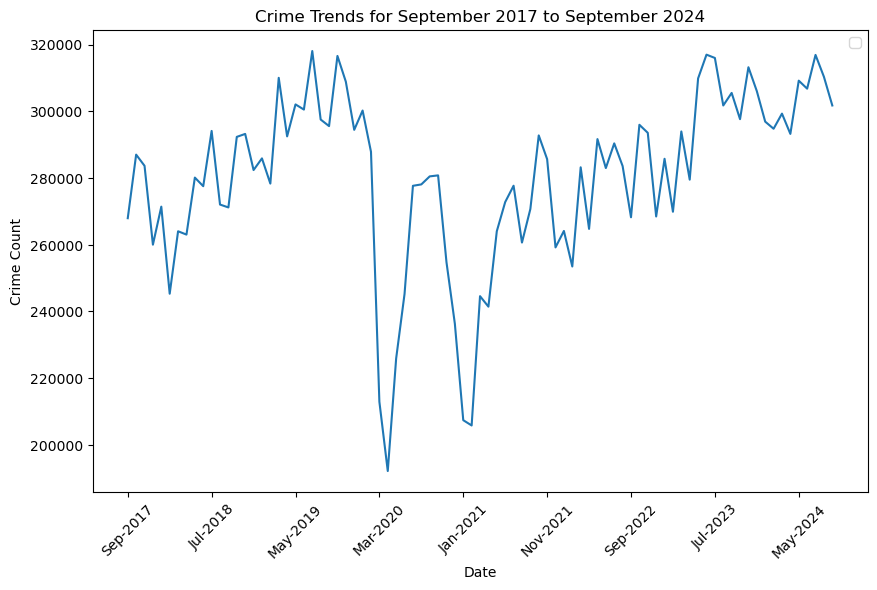

In [68]:
# Plotting the figure using lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x=crime_brgh1.index, y='Sum', data=crime_brgh1)
plt.title('Crime Trends for September 2017 to September 2024')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Plotting the line when the 1st lockdown happened
#plt.axvline(x='Mar-2020', color='red', linestyle='--', label='1st Lockdown')
# Plotting the shade area representing the period that's been impacted by COVID-19
#plt.axvspan('Mar-2020', 'Sep-2023', alpha=0.3, color='gray')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.legend()

Reference: https://github.com/radoi90/housequest-data/blob/master/london_boroughs.geojson